In [1]:
import os
import polars as pl
from RIG import RuleInstanceGenerator
import pandas as pd

csv_path = "/Users/yuda/Desktop/RIG_v1/evaluation/data/data_yuda.csv"
df = pl.read_csv(csv_path)

rig = RuleInstanceGenerator(rag_difference=0.00)
rig.init_gemma_model()


pulling manifest


pulling 4c5716ded514:   0%|          | 0.00/274M [00:00<?, ?B/s]
pulling c71d239df917:   0%|          | 0.00/11.4k [00:00<?, ?B/s]

pulling 4c5716ded514: 100%|██████████| 274M/274M [00:00<00:00, 64.5GB/s]
pulling c71d239df917: 100%|██████████| 11.4k/11.4k [00:00<00:00, 3.81MB/s]
pulling 7424a767001b: 100%|██████████| 346/346 [00:00<00:00, 206kB/s]


verifying sha256 digest
writing manifest
success


llama_new_context_with_model: n_ctx_per_seq (640) < n_ctx_train (8192) -- the full capacity of the model will not be utilized
ggml_metal_init: skipping kernel_get_rows_bf16                     (not supported)
ggml_metal_init: skipping kernel_mul_mv_bf16_f32                   (not supported)
ggml_metal_init: skipping kernel_mul_mv_bf16_f32_1row              (not supported)
ggml_metal_init: skipping kernel_mul_mv_bf16_f32_l4                (not supported)
ggml_metal_init: skipping kernel_mul_mv_bf16_bf16                  (not supported)
ggml_metal_init: skipping kernel_mul_mv_id_bf16_f32                (not supported)
ggml_metal_init: skipping kernel_mul_mm_bf16_f32                   (not supported)
ggml_metal_init: skipping kernel_mul_mm_id_bf16_f32                (not supported)
ggml_metal_init: skipping kernel_flash_attn_ext_bf16_h64           (not supported)
ggml_metal_init: skipping kernel_flash_attn_ext_bf16_h80           (not supported)
ggml_metal_init: skipping kernel_flash_attn_

True

In [2]:

folder_path = "/Users/yuda/Desktop/RIG_v1/evaluation/data/rule_types"
rig.add_rule_types_from_folder(folder_path)

rule_types_loaded: ['Bridge.json', 'Tentacled_Sea_Cucumber.json', 'Cavalry_Charge.json', 'Guerrilla_Skirmish.json', 'Sea_Otter.json', 'Morning_Star.json', 'Warehouse.json', 'Journalist.json', 'Rapier.json', 'Graphic_Designer.json', 'Puffin.json', 'Data_Analyst.json', 'Teacher.json', 'Hamster.json', 'Katana.json', 'Scientist.json', 'Boomerang.json', 'Koala.json', 'Counteroffensive.json', 'Nurse.json', 'Night_Raid.json', 'Dentist.json', 'Gondola.json', 'Halberd.json', 'Engineer.json', 'Hospital.json', 'Personal_Trainer.json', 'Tarantula.json', 'Architect.json', 'Bastard_Sword.json', 'Apartment_Building.json', 'Beaver.json', 'Flanking_Maneuver.json', 'Komodo_Dragon.json', 'Molotov_Cocktail.json', 'Bull.json', 'Fox.json', 'Flail.json', 'Firefighter.json', 'Kayak.json', 'Ballista.json', 'Farmer.json', 'Evacuation_Operation.json', 'Trench_Assault.json', 'Cow.json', 'Chef.json', 'Actor.json', 'ATV.json', 'Castle.json', 'Multi_Motor_Trampoline.json', 'Parrotfish.json', 'Aerial_Dogfight.json', 

"rule_types_loaded: ['Bridge.json', 'Tentacled_Sea_Cucumber.json', 'Cavalry_Charge.json', 'Guerrilla_Skirmish.json', 'Sea_Otter.json', 'Morning_Star.json', 'Warehouse.json', 'Journalist.json', 'Rapier.json', 'Graphic_Designer.json', 'Puffin.json', 'Data_Analyst.json', 'Teacher.json', 'Hamster.json', 'Katana.json', 'Scientist.json', 'Boomerang.json', 'Koala.json', 'Counteroffensive.json', 'Nurse.json', 'Night_Raid.json', 'Dentist.json', 'Gondola.json', 'Halberd.json', 'Engineer.json', 'Hospital.json', 'Personal_Trainer.json', 'Tarantula.json', 'Architect.json', 'Bastard_Sword.json', 'Apartment_Building.json', 'Beaver.json', 'Flanking_Maneuver.json', 'Komodo_Dragon.json', 'Molotov_Cocktail.json', 'Bull.json', 'Fox.json', 'Flail.json', 'Firefighter.json', 'Kayak.json', 'Ballista.json', 'Farmer.json', 'Evacuation_Operation.json', 'Trench_Assault.json', 'Cow.json', 'Chef.json', 'Actor.json', 'ATV.json', 'Castle.json', 'Multi_Motor_Trampoline.json', 'Parrotfish.json', 'Aerial_Dogfight.json',

In [3]:
write_csv_path = "/Users/yuda/Desktop/RIG_v1/evaluation/output/classification_errors.csv"
def clean_text(text):
    """Remove all non-alphanumeric characters and convert to lowercase."""
    return ''.join(char.lower() for char in text if char.isalnum())

def evaluate_accuracy():
    classification = rig.get_instance.classifier
    rows = []
    correct_predictions = 0

    # Iterate through the DataFrame rows
    for row in df.iter_rows(named=True):
        # Extract the free_text, actual type_name, and expected classification
        free_text = row['free_text']
        actual_type_name = row['rule_types_names']
        id_free_text = row['id']

        # Predict the type name using the RAG API
        try:
            predicted_type_name = str(classification.predict(free_text)[0])
        except:
            predicted_type_name = ""

        # Clean strings for comparison
        actual_type_name_cleaned = clean_text(actual_type_name)
        predicted_type_name_cleaned = clean_text(predicted_type_name)

        # Debugging: Print the cleaned strings
        # print(f"Actual (cleaned): {actual_type_name_cleaned}")
        # print(f"Predicted (cleaned): {predicted_type_name_cleaned}")

        # Calculate the score (1 for correct, 0 for incorrect)
        score = 1 if predicted_type_name_cleaned == actual_type_name_cleaned else 0
        if score == 0:
            print(score)
        correct_predictions += score

        # Append the results to the rows
        rows.append({
            "id": id_free_text,
            "score": score,
            "predicted": predicted_type_name_cleaned,
            "actual": actual_type_name_cleaned,
            "free_text": free_text,
        })

    # Convert rows to a DataFrame
    results_df = pl.DataFrame(rows)

    # Calculate the final score
    accuracy = correct_predictions / len(df)

    return results_df, accuracy

# Run the evaluation
results_df, final_score = evaluate_accuracy()

# Print the final accuracy score
print(f"Accuracy Score: {final_score:.2%}")

# Print rows where the prediction was incorrect
errors = results_df.filter(pl.col("score") == 0).to_dicts()
# print("Errors:", errors)

# Optional: Save errors to a CSV
results_df.filter(pl.col("score") == 0).write_csv(write_csv_path)

# print("results_df['actual'].unique():\n")
# for i, _ in enumerate(results_df['actual'].unique()):
#     print(i, _)
# 
# print("results_df['predicted'].unique():\n")
# for i, _ in enumerate(results_df['predicted'].unique()):
#     print(i, _)

results_df = results_df.to_pandas()


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Accuracy Score: 87.80%


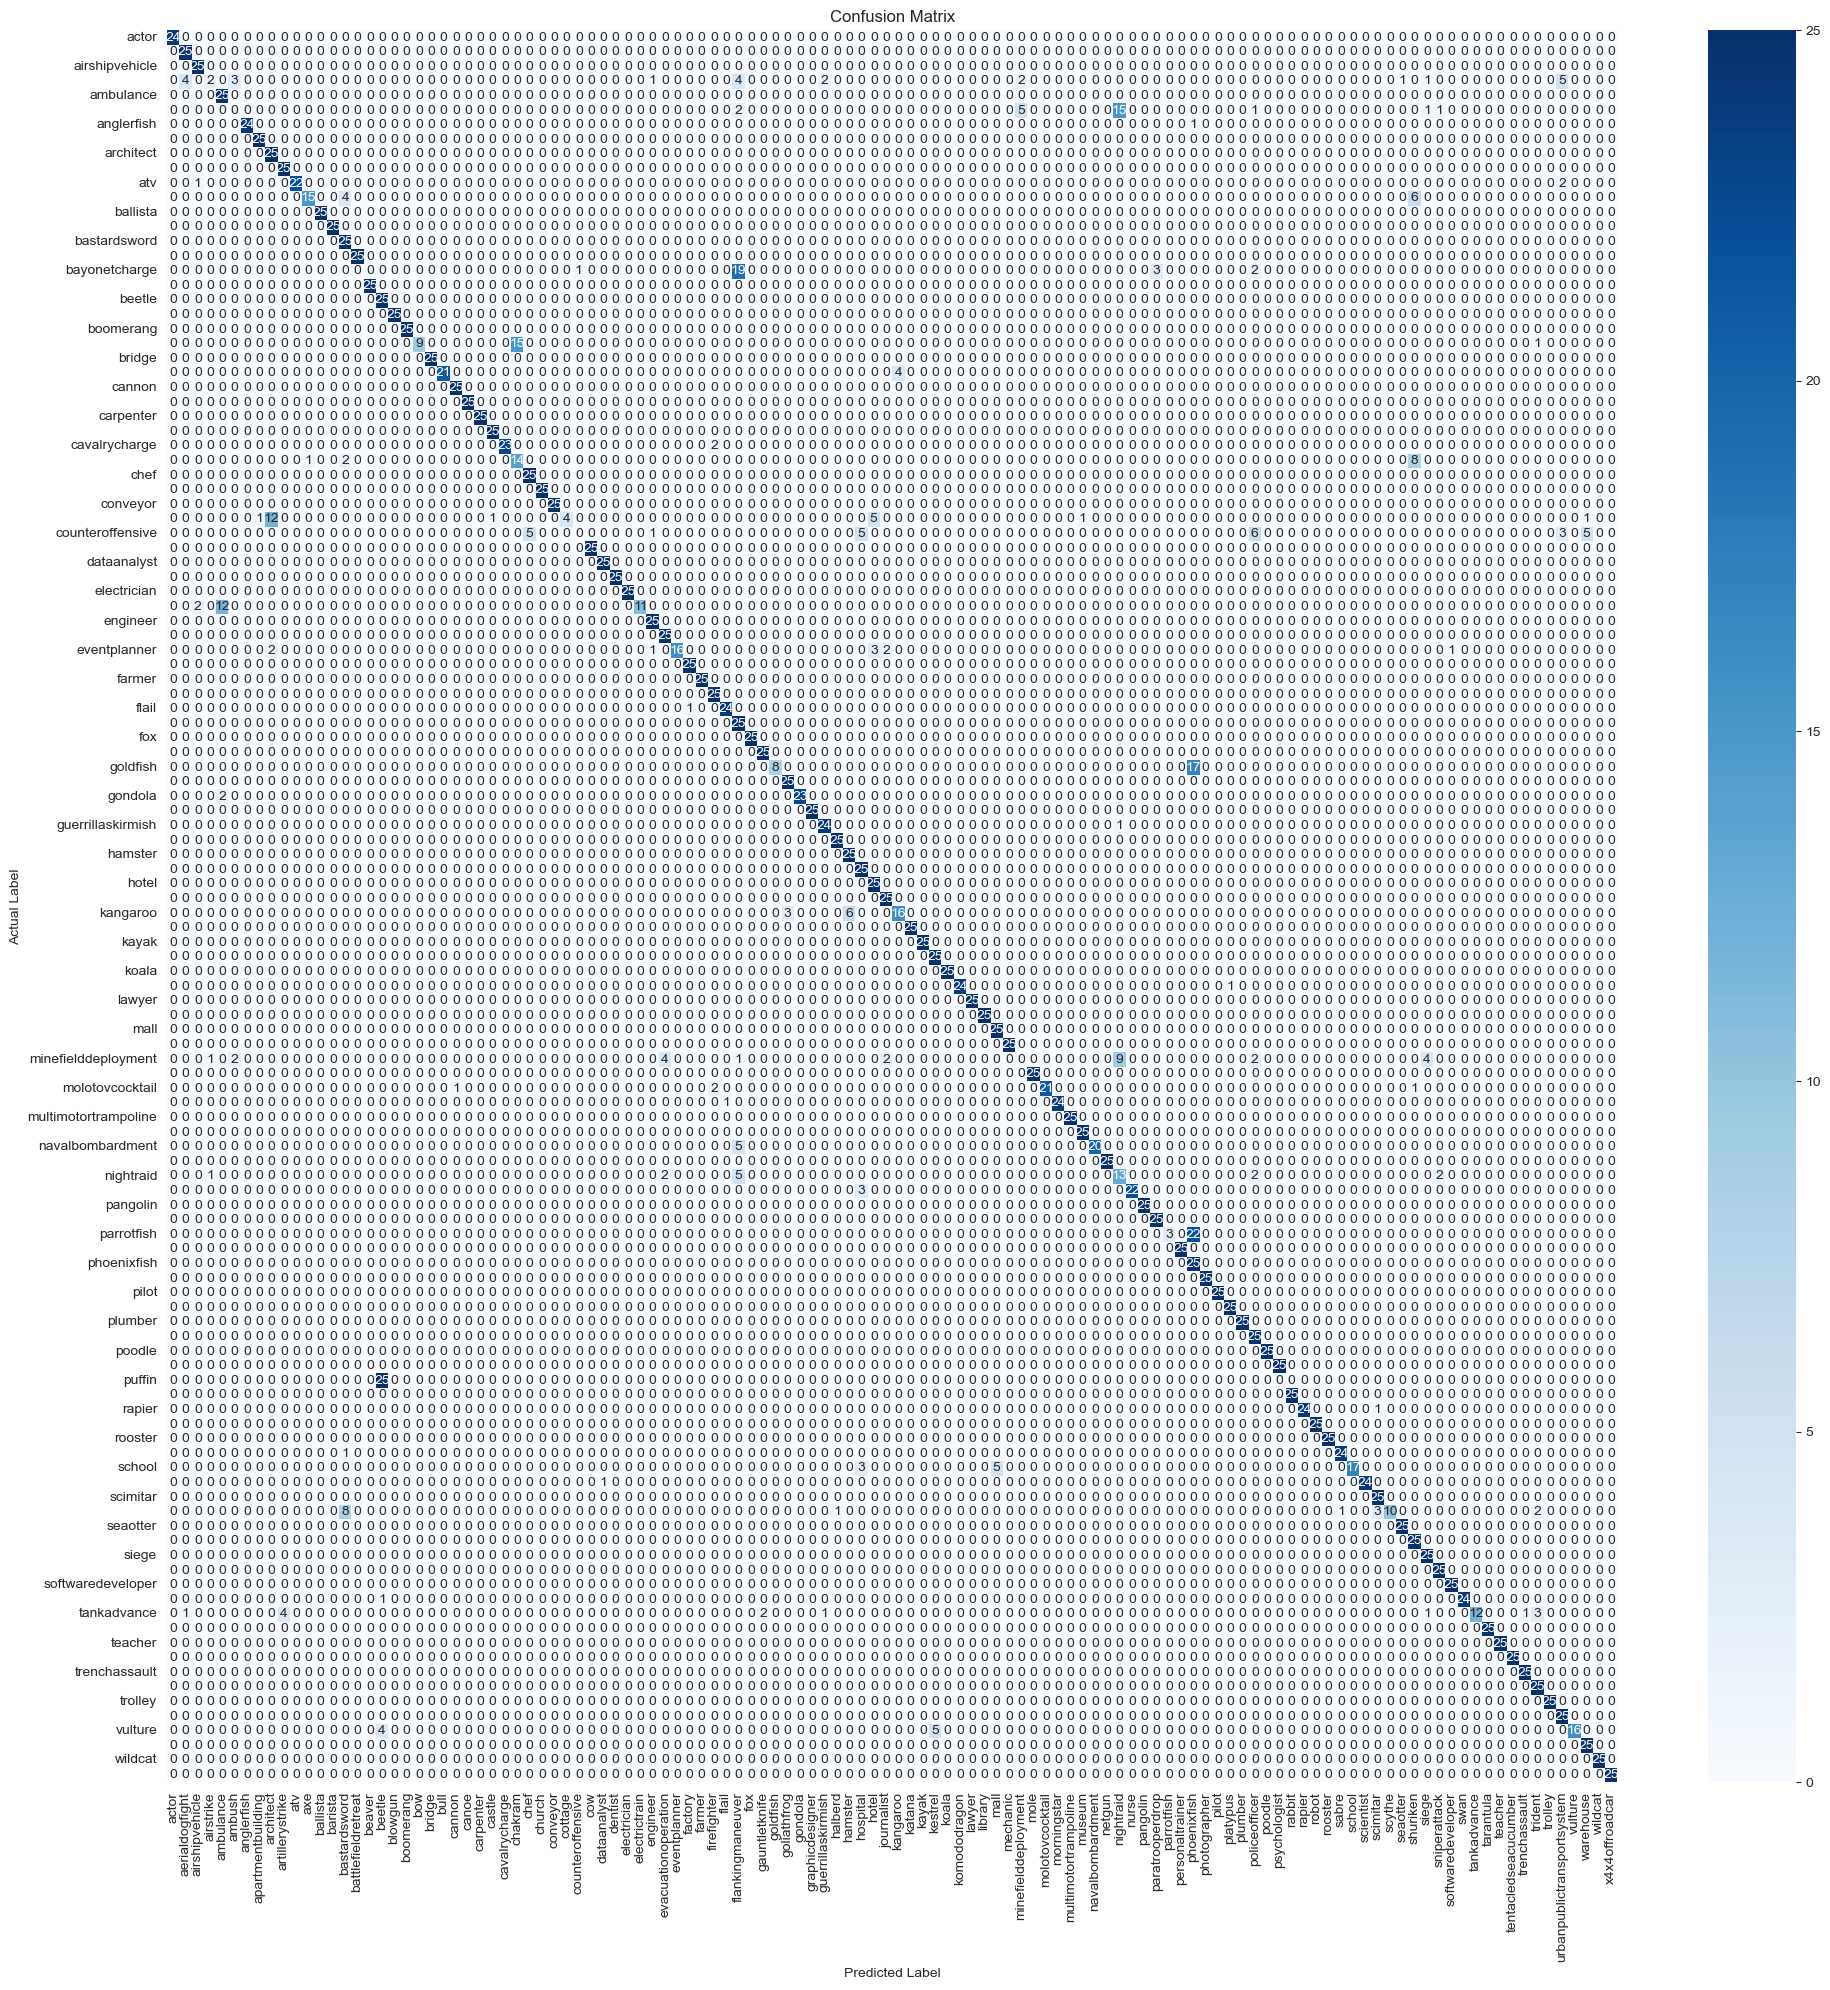

In [4]:

confusion_matrix = pd.crosstab(
    results_df["actual"],
    results_df["predicted"],
    # normalize='index'
)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
sns.heatmap(
    confusion_matrix,
    annot=True,  # Show numbers in each cell
    cmap='Blues',  # Color scheme
    fmt='g',  # Format for the annotations
    xticklabels=confusion_matrix.columns
)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.tight_layout()
plt.show()